[1.42108547e-16 4.44089210e-17 4.56856775e-16]
[1. 1. 1.]
[-0.28034986 -0.65473668  0.42167664]
[0.69835876 0.59887862 0.68026069]
Training data shape:
(50, 2)
Testing data shape:
(10, 2)

normalized training data:
[[-0.00635354 -1.13312693]
 [ 0.7481291  -0.92751508]
 [ 0.54958103 -0.34494816]
 [ 0.86725793 -0.75617187]
 [-0.12548237 -1.30447015]
 [ 0.39074258 -1.61288793]
 [-0.64170733 -1.40042235]
 [-0.99909384 -0.57797492]
 [-0.91967462 -0.07079902]
 [-0.36374005 -0.79044051]
 [-0.68141695  0.3781202 ]
 [ 0.86725793  1.09433483]
 [ 1.62174057  2.53361782]
 [-0.16519199  0.82018569]
 [-1.03880346  0.1862158 ]
 [-0.48286889  0.44323062]
 [ 2.29680397  1.50555854]
 [-0.04606315 -0.85897779]
 [ 0.03335607  0.47749926]
 [ 0.39074258  0.10739793]
 [ 1.30406367  1.16287212]
 [-0.99909384 -0.76302559]
 [-0.5225785  -0.53685255]
 [-0.48286889 -0.54370628]
 [-1.31677074 -0.79386737]
 [-1.43589958 -1.44154472]
 [ 1.22464444  1.29994669]
 [ 1.70115979  2.53361782]
 [ 0.58929065  0.58030519]
 [

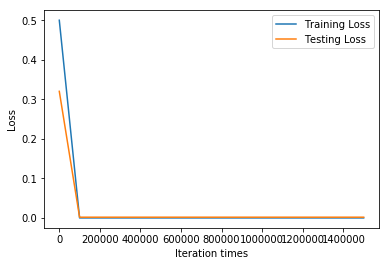

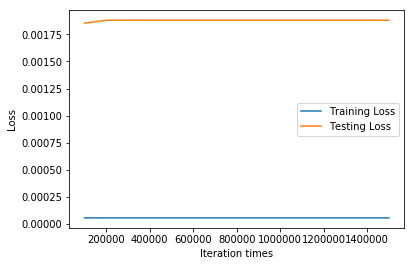

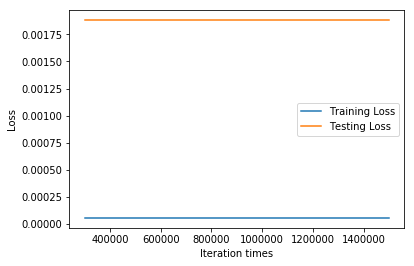

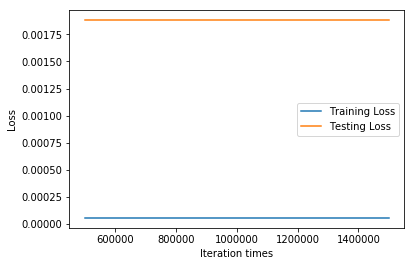

Train Loss:
 [0.49986112, 5.4115448e-05, 5.3752112e-05, 5.3752112e-05, 5.3752112e-05, 5.3752112e-05, 5.3752112e-05, 5.3752112e-05, 5.3752112e-05, 5.3752112e-05, 5.3752112e-05, 5.3752112e-05, 5.3752112e-05, 5.3752112e-05, 5.3752112e-05, 5.3752112e-05]

Test Loss:
 [0.3200914, 0.00185396, 0.0018809683, 0.0018809683, 0.0018809683, 0.0018809683, 0.0018809683, 0.0018809683, 0.0018809683, 0.0018809683, 0.0018809683, 0.0018809683, 0.0018809683, 0.0018809683, 0.0018809683, 0.0018809683]


In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing   

# Try to find value for W and b to compute y_data = x_data * W + b  

# Define dimensions
d = 2    # Size of the parameter space
N = 50 # Number of data sample

# Model parameters
W = tf.Variable(tf.zeros([d, 1], tf.float32), name="weights")
b = tf.Variable(tf.zeros([1], tf.float32), name="biases")

# Model input and output
x = tf.placeholder(tf.float32, shape=[None, d])
y = tf.placeholder(tf.float32, shape=[None, 1])

# hypothesis
linear_regression_model = tf.add(tf.matmul(x, W), b)
# cost/loss function
loss = tf.reduce_mean(tf.square(linear_regression_model - y)) / 2

# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.00015)
train = optimizer.minimize(loss)

# 导入训练集和测试集
training_filename = "dataForTraining.txt"
testing_filename = "dataForTesting.txt"
training_dataset = np.loadtxt(training_filename)
testing_dataset = np.loadtxt(testing_filename)
dataset = np.vstack((training_dataset,testing_dataset))

# 保存训练集中的参数（均值、方差）直接使用其对象转换测试集数据
# 特征缩放
min_max_scaler = preprocessing.MinMaxScaler() 
# 标准化
normal_scaler = preprocessing.StandardScaler().fit(training_dataset)
# 归一化
dataset = min_max_scaler.fit_transform(dataset)
# 标准化
training_dataset = normal_scaler.transform(training_dataset)
testing_dataset = normal_scaler.transform(testing_dataset)

print(np.mean(training_dataset,axis=0))
print(np.std(training_dataset,axis=0))
print(np.mean(testing_dataset,axis=0))
print(np.std(testing_dataset,axis=0))

x_train = np.array(training_dataset[:,:2])
y_train = np.array(training_dataset[:,2:3])
x_test = np.array(testing_dataset[:,:2])
y_test = np.array(testing_dataset[:,2:3])
print("Training data shape:")
print(x_train.shape)
print("Testing data shape:")
print(x_test.shape)
print('')
print("normalized training data:")
print(x_train)
print('')
print("normalized testing data:")
print(x_test)
print('')

mini_batch_size = 1
n_batch = N // mini_batch_size + (N % mini_batch_size != 0)
print(n_batch)

save_step_loss = {"step":[],"train_loss":[],"test_loss":[]}# 保存step和loss用于可视化操作
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)  # reset values to wrong
    steps = 1500001
    for i in range(steps):
        i_batch = (i % n_batch)*mini_batch_size
        batch = x_train[i_batch:i_batch+mini_batch_size], y_train[i_batch:i_batch+mini_batch_size]
        sess.run(train, {x: batch[0], y:batch[1]})
#         random_index = np.random.choice(N)
#         sess.run(train, {x: [x_train[random_index]], y:[y_train[random_index]]})
        if i % 100000 == 0:
            # evaluate training accuracy
            print("iteration times: %s" % i)
            curr_W, curr_b, curr_train_loss = sess.run([W, b, loss], {x: x_train, y: y_train})
            print("W: %s \nb: %s \nTrain Loss: %s" % (curr_W, curr_b, curr_train_loss))
            # Accuracy computation
            curr_test_loss = sess.run(loss,{x:x_test,y:y_test})
            print("Test Loss: %s\n" % curr_test_loss)
            save_step_loss["step"].append(i)
            save_step_loss["train_loss"].append(curr_train_loss)
            save_step_loss["test_loss"].append(curr_test_loss)

#画图损失函数变化曲线
plt.plot(save_step_loss["step"],save_step_loss["train_loss"],label='Training Loss')
plt.plot(save_step_loss["step"],save_step_loss["test_loss"],label='Testing Loss')
plt.xlabel('Iteration times')
plt.ylabel('Loss')
plt.legend()
plt.show()
#画图损失函数变化曲线
plt.plot(save_step_loss["step"][1:],save_step_loss["train_loss"][1:],label='Training Loss')
plt.plot(save_step_loss["step"][1:],save_step_loss["test_loss"][1:],label='Testing Loss')
plt.xlabel('Iteration times')
plt.ylabel('Loss')
plt.legend()
plt.show()
#画图损失函数变化曲线
plt.plot(save_step_loss["step"][3:],save_step_loss["train_loss"][3:],label='Training Loss')
plt.plot(save_step_loss["step"][3:],save_step_loss["test_loss"][3:],label='Testing Loss')
plt.xlabel('Iteration times')
plt.ylabel('Loss')
plt.legend()
plt.show()
#画图损失函数变化曲线
plt.plot(save_step_loss["step"][5:],save_step_loss["train_loss"][5:],label='Training Loss')
plt.plot(save_step_loss["step"][5:],save_step_loss["test_loss"][5:],label='Testing Loss')
plt.xlabel('Iteration times')
plt.ylabel('Loss')
plt.legend()
plt.show()

print('Train Loss:\n',save_step_loss["train_loss"])
print('')
print('Test Loss:\n',save_step_loss["test_loss"])